In [1]:
'''
Visualize the Heart disease dataset by plotting the following graphs using Python. (Define 
objective for every graph)  
a. Histograms    
b. Dot Plots   
c. Bar Plots   
d. Line Charts   
e. Add Histogram and Scatter plot to box plot.

Visualize the Heart disease dataset by plotting the following graphs using Python. (Define 
objective for every graph)     
b. Pie Charts   
c. Box Plots   
d. Scatter Plots   
e. Add boxplots to a scatterplot
'''

'\nVisualize the Heart disease dataset by plotting the following graphs using Python. (Define \nobjective for every graph)  \na. Histograms    \nb. Dot Plots   \nc. Bar Plots   \nd. Line Charts   \ne. Add Histogram and Scatter plot to box plot.\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# List of dataset paths
files = [
    r"DSBDALExam DataSets\HeartDisease\Cleavland.csv",
    r"DSBDALExam DataSets\HeartDisease\hung.csv",
    r"DSBDALExam DataSets\HeartDisease\Switzerland.csv"
]

# Define column names based on known attributes used in past experiments
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Combine datasets
df_list = []
for file in files:
    df = pd.read_csv(file, header=None, names=columns, na_values='?')
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<Figure size 1200x600 with 0 Axes>

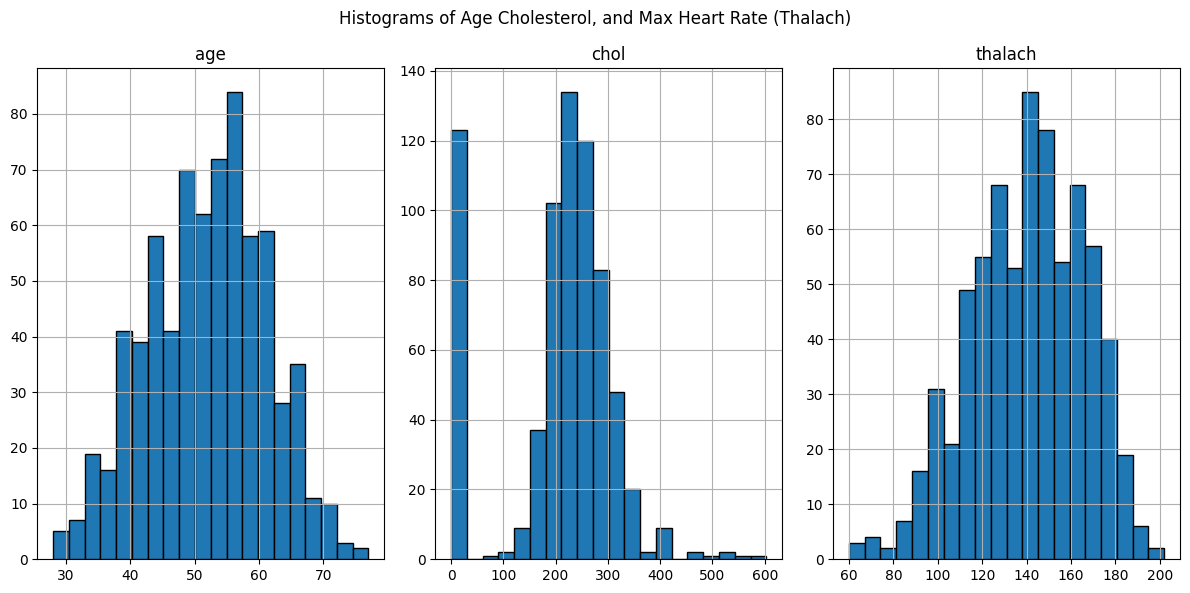

In [6]:
# Histogram
# Show the distribution of numerical attributes like age, chol, and thalach to understand their spread and skewness.
plt.figure(figsize=(12,6))
data[['age', 'chol', 'thalach']].hist(bins=20, figsize=(12, 6), layout=(1,3), edgecolor='black')
plt.suptitle("Histograms of Age Cholesterol, and Max Heart Rate (Thalach)")
plt.tight_layout()
plt.show()

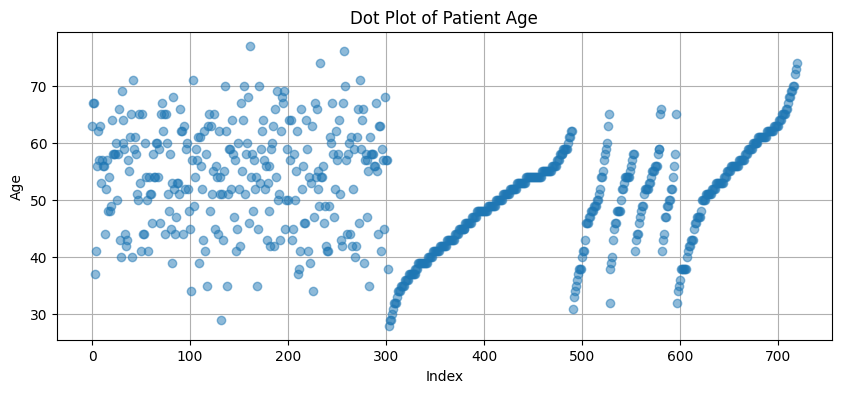

In [10]:
# Dot Plots
# Visualize individual data points for a feature like age across the dataset

plt.figure(figsize=(10,4))
plt.plot(data.index, data['age'], 'o', alpha=0.5)
plt.title("Dot Plot of Patient Age")
plt.xlabel("Index")
plt.ylabel("Age")
plt.grid(True)
plt.show()

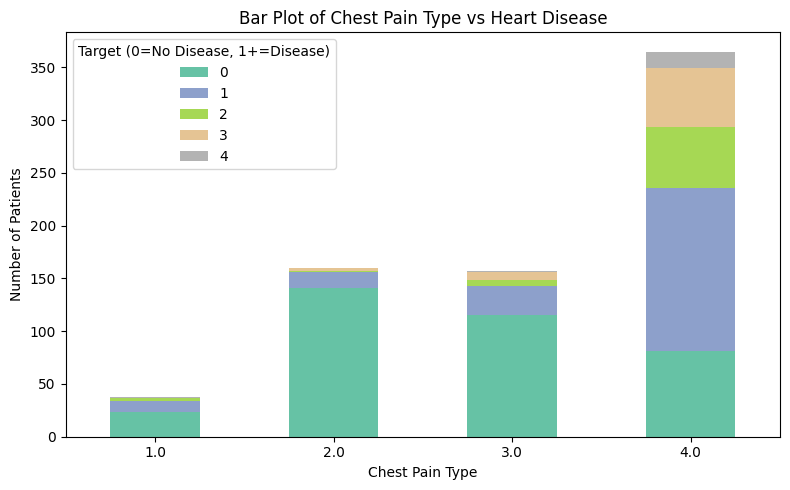

In [13]:
# Bar Plot
# Compare categorical values like chest pain type (cp) against the target (presence of heart disease)

cp_counts = data.groupby('cp')['target'].value_counts().unstack().fillna(0)
cp_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title("Bar Plot of Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.legend(title="Target (0=No Disease, 1+=Disease)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

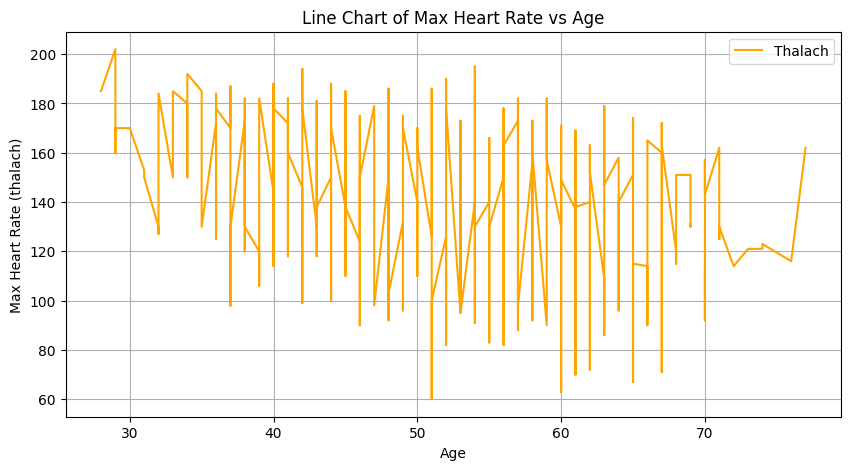

In [15]:
# Line Charts
# Show trends over sorted age to observe how thalach (max heart rate) changes with age.

sorted_data = data.sort_values(by='age')
plt.figure(figsize=(10, 5))
plt.plot(sorted_data['age'], sorted_data['thalach'], label='Thalach', color='orange')
plt.title("Line Chart of Max Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_21408\2989480596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=data, ax=ax, palette="Set3")


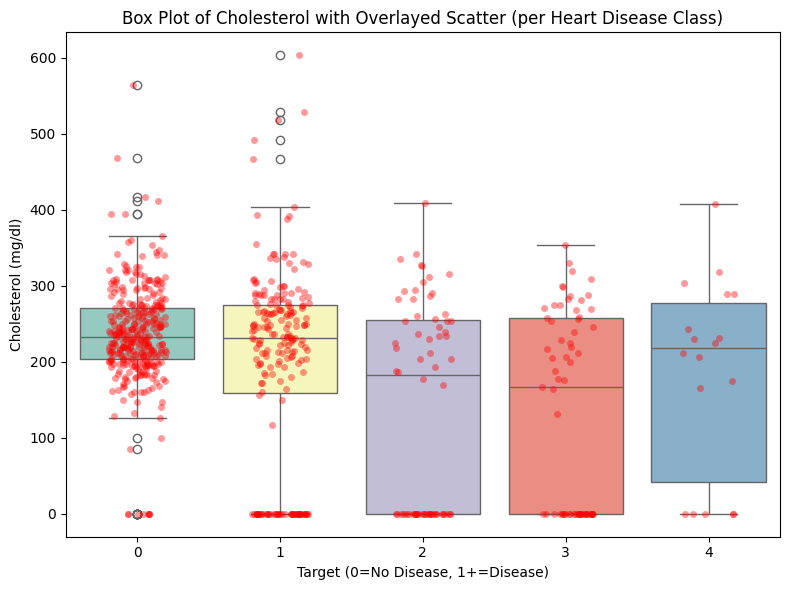

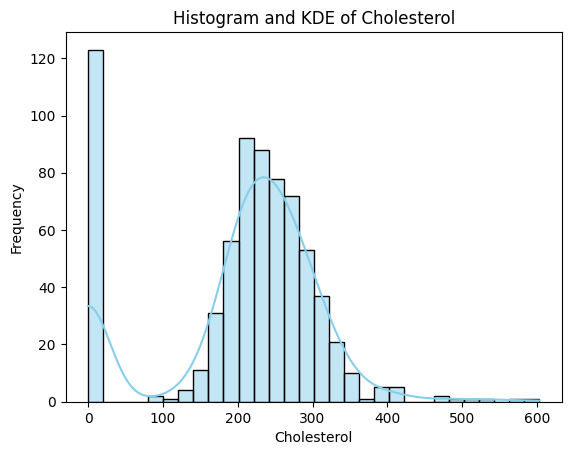

In [18]:
# Add Histogram and Scatter Plot to Box Plot
# Provide deep insights into chol distribution using box plot + histogram + scatter (strip plot)

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='target', y='chol', data=data, ax=ax, palette="Set3")
sns.stripplot(x='target', y='chol', data=data, color='red', alpha=0.4, jitter=0.2, ax=ax)
plt.title("Box Plot of Cholesterol with Overlayed Scatter (per Heart Disease Class)")
plt.xlabel("Target (0=No Disease, 1+=Disease)")
plt.ylabel("Cholesterol (mg/dl)")
plt.tight_layout()
plt.show()

# Histogram overlaid
sns.histplot(data['chol'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Histogram and KDE of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

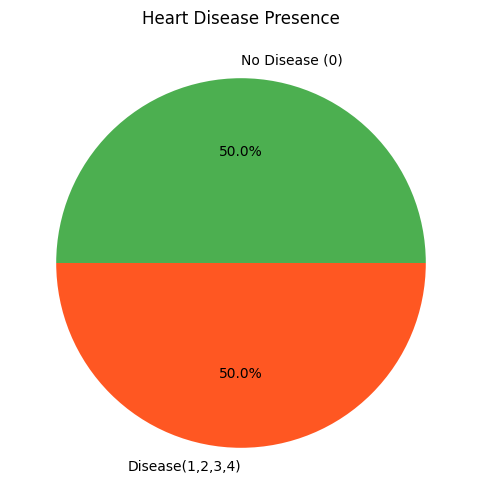

In [21]:
# Pie Chart
# Visualize proportions of key categorical features like sex, cp, and target

# Pie Chart for Target (Heart disease presence)
labels = ['No Disease (0)', 'Disease(1,2,3,4)']
data['target_binary'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
sizes = data['target_binary'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'])
plt.title('Heart Disease Presence')
plt.show()

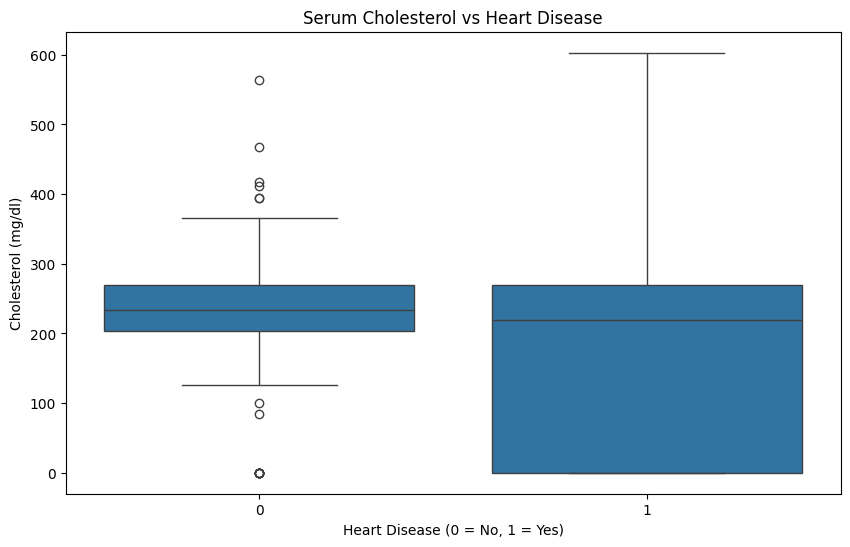

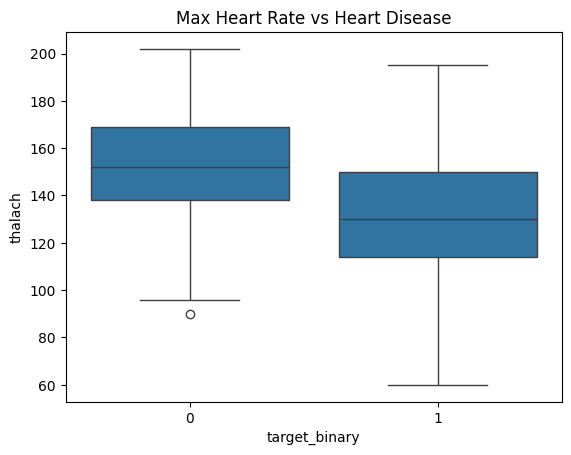

In [23]:
# Box Plots
# Show distribution and outliers of continuous features based on heart disease presence

plt.figure(figsize=(10, 6))
sns.boxplot(x='target_binary', y='chol', data=data)
plt.title("Serum Cholesterol vs Heart Disease")
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

sns.boxplot(x='target_binary', y='thalach', data=data)
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

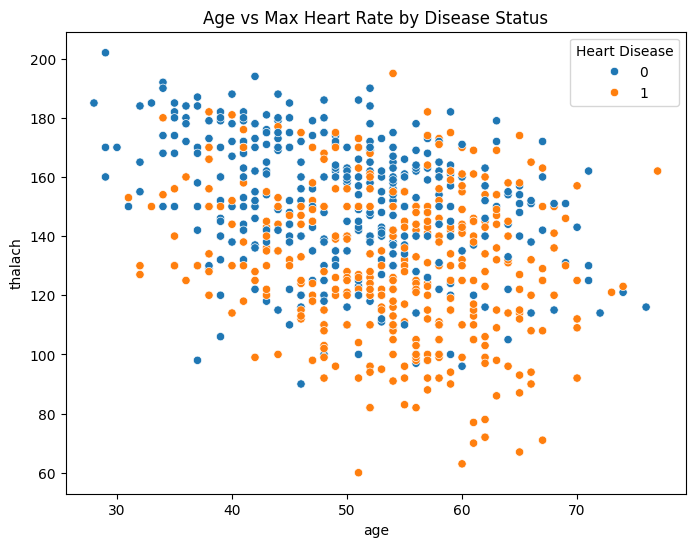

In [25]:
# Scatter Plot
# Observe relationships between two continuous variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target_binary', data=data)
plt.title('Age vs Max Heart Rate by Disease Status')
plt.legend(title='Heart Disease')
plt.show()

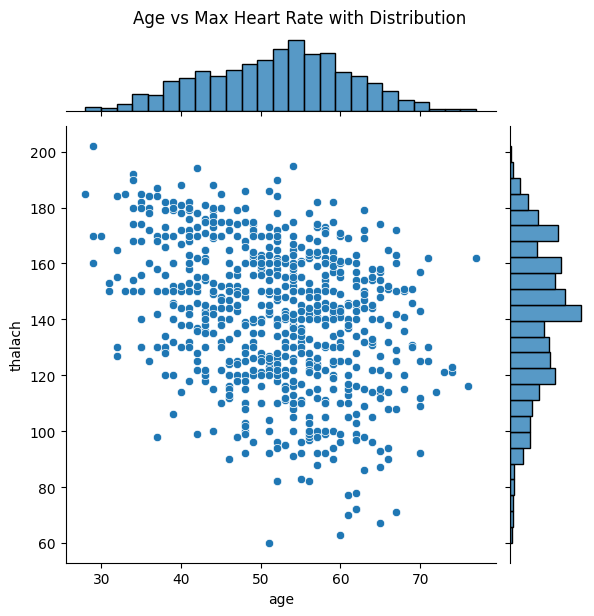

In [32]:
# Add Boxplots to a Scatterplot
# Combine trend (scatter) and distribution (box) in one plot for deeper insight

# Joint plot with boxplot + scatter
sns.jointplot(data=data, x="age", y="thalach", kind="scatter", marginal_kws=dict(bins=25, fill=True))
# sns.pairplot(data, hue="target_binary", vars=["age", "thalach"])
plt.suptitle("Age vs Max Heart Rate with Distribution", y=1.02)
plt.show()

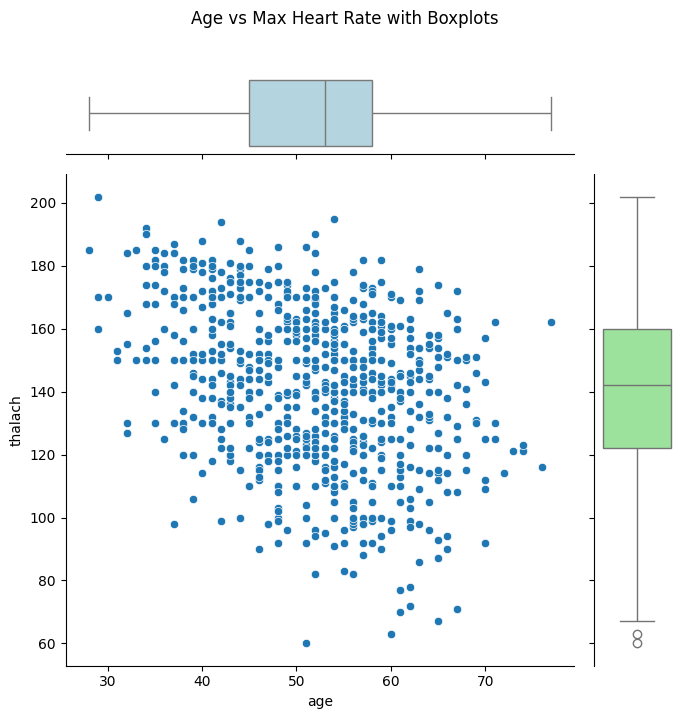

In [33]:
# Create a JointGrid
g = sns.JointGrid(data=data, x="age", y="thalach", height=7)

# Main scatterplot in the center
g.plot_joint(sns.scatterplot)

# Boxplots on the margins
sns.boxplot(data=data, x="age", ax=g.ax_marg_x, color='lightblue')
sns.boxplot(data=data, y="thalach", ax=g.ax_marg_y, color='lightgreen')

# Add title
plt.suptitle("Age vs Max Heart Rate with Boxplots", y=1.02)
plt.tight_layout()
plt.show()